# Module 01: A Very Brief Introduction to Python

## 1. Introduction and Background

This notebook provides a very brief introduction to both how we'll be using Python in this class, as well as the layout of many of the Jupyter notebooks that we will be using throughout the semester. If you note, this notebook intersperses blocks of formatted text and Python code. These blocks are referred to as _cells_ and from a teaching, learning, and communication standpoint they allow the developer to show you the code that we're developing and running, as well as inserting some text to provide some context or explanation of how we're using that code. If you are new to Jupyter notebooks, take a minute or two to scroll to the top and bottom of this notebook to see how it's organized. 

This cell is a text cell and that uses a lightweight markup language called __Markdown__ to provide some formatting tools for us. For example, the headers at the top of this cell use a simple `#` in front of the text to create section headers. Additionally, the hash symbol in the previous sentence was formatted using a simple backtick `` ` `` to format the text to appear how it might appear in code. Markdown also provides us access to a $\LaTeX$ editor that will also allow us to insert equations into our text like this one:

$$
x_i = x_{i-1} + (\mu_x + \sigma_x N(0,1))
$$

In particular, we will use the GitHub "flavor" of Markdown, which has a few limitations relative to full Markdown. These limitations are almost never too much of a problem and, nevertheless, will allow us to create nicely formatted Jupyter notebooks that illustrate both our modeling skills as well as our understanding of the underlying principles. [This site on GitHub](https://guides.github.com/features/mastering-markdown/) provides an overview and links to a cheat sheet for using GitHub-flavored Markdown. I would recommend bookmarking -- I use it all the time! 

Throughout this class you will use these Jupyter notebooks to use and modify some existing models that I have created for you and to perform coding problem sets that you will submit for grading. When you submit an assignment, you will ___submit the URL to a Jupyter notebook you have committed to GitHub in Canvas___. This might seem confusing at first, but by continually adding notebooks to your GitHub account you will develop a portfolio of code that illustrates some of your skills in Earth and environmental systems modeling. 

Let's get started with the problem and objectives of this notebook. 

## 2. Objectives
The objectives of this notebook are to:
1. Use Python to create and run a Random Walk model
2. Demonstrate how to use some basic plotting tools in Python to create effective visualizations of our model output. 

## 3. Initial Setup
Below we set up out modeling environment by: (1) importing the Python libraries we will need for this notebook and (1) initializing a few variables (and their values) that are used throughout our model (and that we can change to consider additional scenarios or behavior). Take note both of the libraries we will be using (we will use these for probably every notebook), how we name the variables, and how we include comments in the code.  

In [2]:
import numpy as np # Numpy is needed for numerical operations like creating arrays and random numbers
import matplotlib.pyplot as plt # Matplotlib is needed to create plots

Nt = 200 # This is the number of steps (or time steps) in our Random Walk
mu_x = 0.75 # The average step size in our random walk
s_x = 0.75 # The standard deviation of the step size in our random walk

## 4. Running the Model

The Random Walk is a mathematically straightforward model. In words we can describe a Random Walk as _"a walk in which each step is of random length and direction."_ In one dimension, this simplifies further so that each step is of random length. In fact, in one dimension, the equation describing the model is that presented above in the introduction, where $x_i$ is the location of the "walker" at step $i$, $x_{i-1}$ is the location of the walker at the previous time step, $\mu_x$ is the average step size of the walker, $\sigma_x$ is the standard deviation of walker's step size, and $N(0,1)$ is a [standard normally distributed random number](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution). __Note__ that we have already declared and initiated the variables that contain $\mu_x$ and $\sigma_x$. What are they? 

The steps in this part of the code are to:
1. Create a container variable to store the position of the random walker at each time step.
2. Loop through the number of time steps, generating random step sizes and calculating the new position at each time step.

In [3]:
# Create a container to store the position of the random walker 
# at each time step. Note that this corresponds to an array of 
# zeros that is Nt x 1.
x = np.zeros(Nt)

# This is the syntax for a Python for loop. It loops through all elements in
# an array – in this case going from 0 to (Nt-1) – created with np.arange(Nt)
for i in np.arange(Nt): 

    # Calculate the step size at step i... note that np.random.randn() creates
    # a single random number with mean = 0, and standard deviation = 1.
    x_i = s_x*np.random.randn() + mu_x

    # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
    # then there was no previous step, so the position is 0. If (i>0) the previous location
    # was the value of x at step i-1
    if(i==0): 
        x[i] = 0.0 + x_i # The new position is 0.0 plus the random step size
    else:
        x[i] = x[i-1] + x_i # The new position is the previous position plus the random step size


### 4.1 Plotting Model Results

Now we will plot the results of our model. The array `x` contains the position of our random walker at each (time) step `i`. So, accordingly, we should probably plot `x` against the step number. 

Text(0, 0.5, 'Distance Traveled [m]')

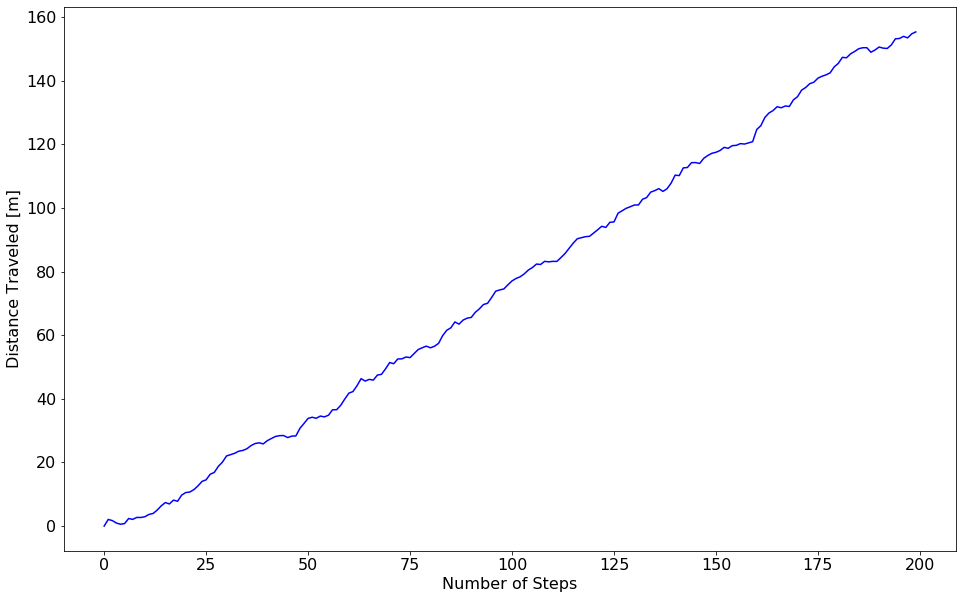

In [4]:
# This command makes the font size for all of our figures in this notebook 16. I usually do 
# this because I find the default font size too small. There are other ways to change the 
# font size we'll explore later in the semester.
plt.rcParams.update({'font.size': 16}) 

plt.figure(figsize=(16,10)) # Create a figure and make it 16" wide x 10" tall
plt.plot(np.arange(Nt),x,'b-') # Plot x vs i (created using np.arange(Nt)) as a blue line
plt.xlabel('Number of Steps') # Label the x-axis as the number of steps
plt.ylabel('Distance Traveled [m]') # Label distance traveled

### 4.2 A Slightly More Complicated Model

The model above is interesting, but not that interesting. When it gets interesting is when we have many different walkers, each going on it's own random walk in ways controlled by the statistical parameters of the Random Walk model (what are they again). In this case, we will create a new Random Walk model for 1000 random walkers. We will generate random step sizes for each walker and at each time step, and calculate their position from the origin (`x` = 0.0). 

In [5]:
Nx = 1000 # Initialize the number of walkers. Note Nt is still 200

# Create a new container for all walkers at each time step. This will correspond to an 
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker. 
X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            
# Just to underscore X[26,156] corresponds to the 27th time step and the 157th walker because 
# Python arrays are zero-based (i.e., the first element is 0). 

### 4.3 Plot Results of a Multi-walker Random Walk

Now let's plot the location of all of our random walkers through time to observe the behavior of the random walk model. Luckily, this is a straighforward extension of our previous plot

Text(0, 0.5, 'Distance Traveled [m]')

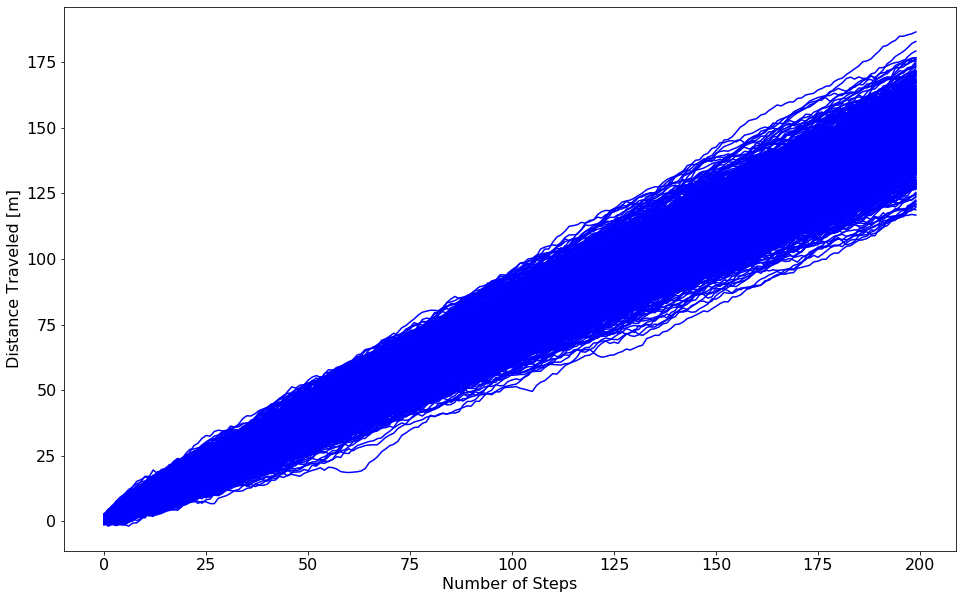

In [6]:
plt.figure(figsize=(16,10)) # Create a new figure and make it 16" wide by 10" tall

plt.plot(np.arange(Nt),X,'b-') # Plot the location of all walkers versus time as blue lines
plt.xlabel('Number of Steps') # Label the x-axis
plt.ylabel('Distance Traveled [m]') # Label the y-axis

### 4.4 Slightly More Complicated Plots
Huh, that's interesting. It appears that our walkers are growing further and further apart through time. Let's use `numpy` to calculate some basic statistics about the average location of all of our walkers through time, as well as how far apart they are from one another through time. We will use `plt.subplot` to create a plot of each of these statistics on the same figure. 

Text(0, 0.5, 'Standard Deviation Distance Traveled [m]')

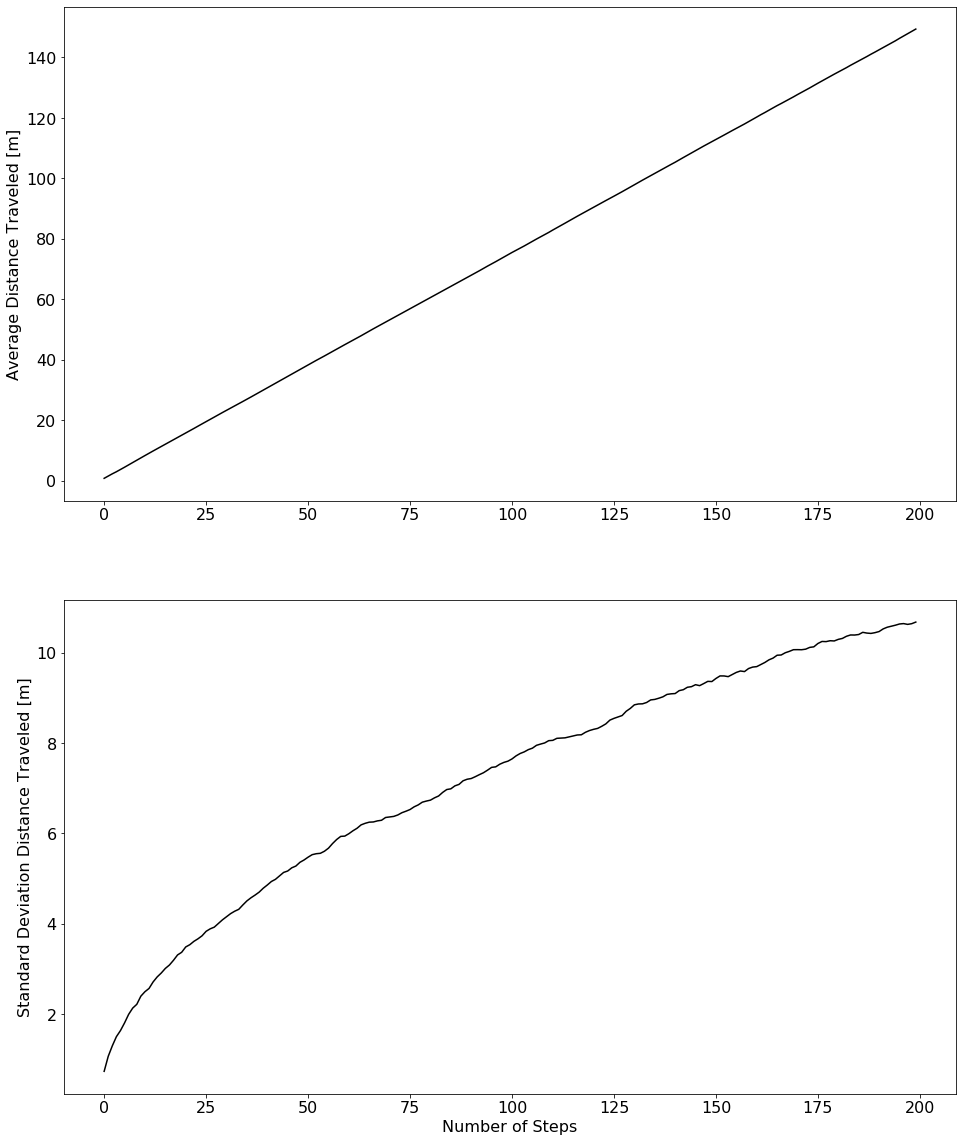

In [7]:
mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,20)) # Create a new figure and make it 16" x 20" 
plt.subplot(2,1,1) # Create a subplot that is 2 rows x 1 column and call the first plot
plt.plot(np.arange(Nt),mean_X,'k-') # Plot the mean position as a black line
plt.ylabel('Average Distance Traveled [m]') # Label the y-axis (our subplots share an x-axis so we will only label one)

plt.subplot(2,1,2) # Create a subplot that is 2 rows x 1 column and call the second plot
plt.plot(np.arange(Nt),std_X,'k-') # Plot the standard deviation in position as a black line
plt.xlabel('Number of Steps') # Now label the x-axis
plt.ylabel('Standard Deviation Distance Traveled [m]') #Label the y-axis

## 5. Some Additional Plots

The code and plots below are just more sophisticated analyses of our existing random walk model stored in `X`. We do not perform any additional model runs below, but I am presenting the model in slightly different ways. Your task is to partner with a classmate and discern what is being plotted below and comment the code to illustrate your understanding of it. 

### 5.1 Plot 1

Text(0, 0.5, 'Distance Traveled [m]')

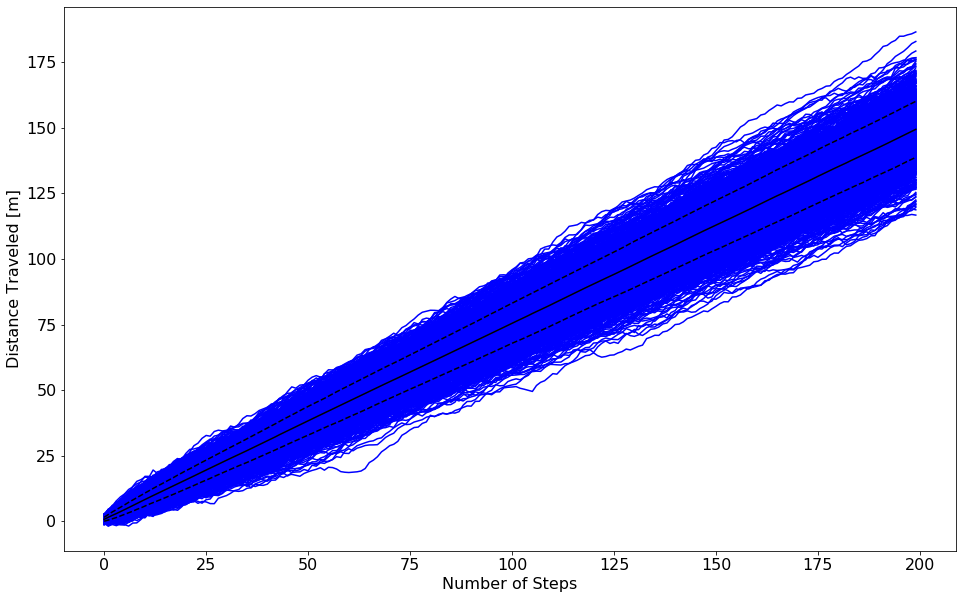

In [13]:
plt.figure(figsize=(16,10)) 

plt.plot(np.arange(Nt),X,'b-') 
plt.plot(np.arange(Nt),mean_X,'k-')
plt.plot(np.arange(Nt),mean_X + std_X, 'k--')
plt.plot(np.arange(Nt),mean_X - std_X, 'k--')
plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]') 

### 5.2 Plot 2

Some hints:
* `numpy.histogram`: https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
* `matplotlib.pyplot.bar`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Text(0, 0.5, 'Frequency [-]')

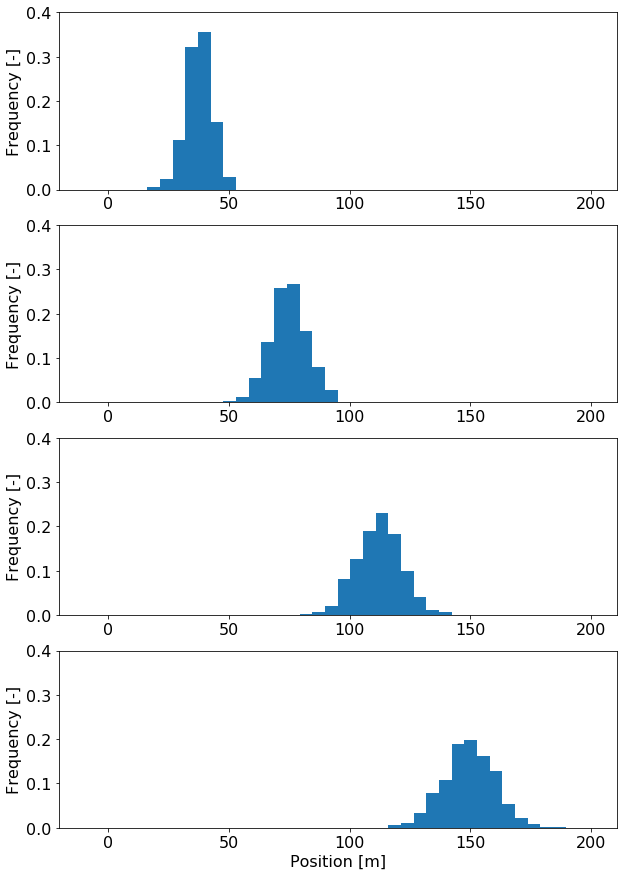

In [36]:
x_50, be_50 = np.histogram(X[49,:], bins=40, range=(-10.0,200))
x_100, be_100 = np.histogram(X[99,:], bins=40, range=(-10.0,200))
x_150, be_150 = np.histogram(X[149,:], bins=40, range=(-10.0,200))
x_200, be_200 = np.histogram(X[-1,:], bins=40, range=(-10.0,200))

plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')


## References

1. Random walk models: https://en.wikipedia.org/wiki/Random_walk#Gaussian_random_walk
2. `Numpy` commands used:  

    a. `numpy.arange`: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    
    b. `numpy.zeros`: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
    
    c. `numpy.random.randn`: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html 
    
    d. `numpy.mean`: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
    
    e. `numpy.std`: https://numpy.org/doc/stable/reference/generated/numpy.std.html
    
3. `Matplotlib` commands used:  
    a. `matplotlib.pyplot.figure`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html 

    b. `matplotlib.pyplot.plot`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    
    c. `matplotlib.pyplot.xlabel`,`*.ylabel`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html 
    
    d. `matplotlib.pyplot.subplot`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
    
    e. `matplotlib.pyplot.ylim`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html